In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 5)
plt.rcParams['font.family'] = 'sans-serif'

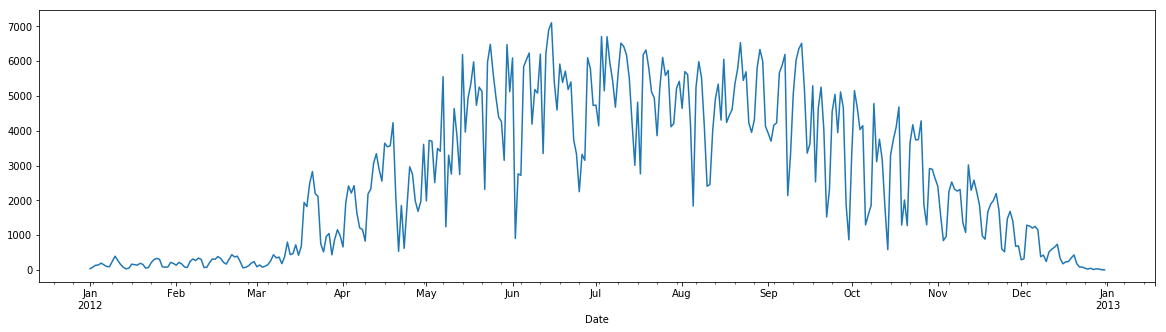

In [8]:
bikes = pd.read_csv('data/bikes.csv', dayfirst=True, parse_dates=['Date'], index_col='Date')
bikes['Berri1'].plot()

In [9]:
berri_bikes = bikes[['Berri1']].copy()
berri_bikes[:5]

,Berri1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


In [10]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

In [12]:
# Here day 0 is Monday.  Got it by checking with calendar
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=366)

In [13]:
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

,Berri1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


In [14]:
# Use groupby to see number of bikers on each day of the week
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri1
weekday,
0,142285
1,145795
2,163603
3,169976
4,150493
5,105635
6,102447


In [15]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                       'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri1
Monday,142285
Tuesday,145795
Wednesday,163603
Thursday,169976
Friday,150493
Saturday,105635
Sunday,102447


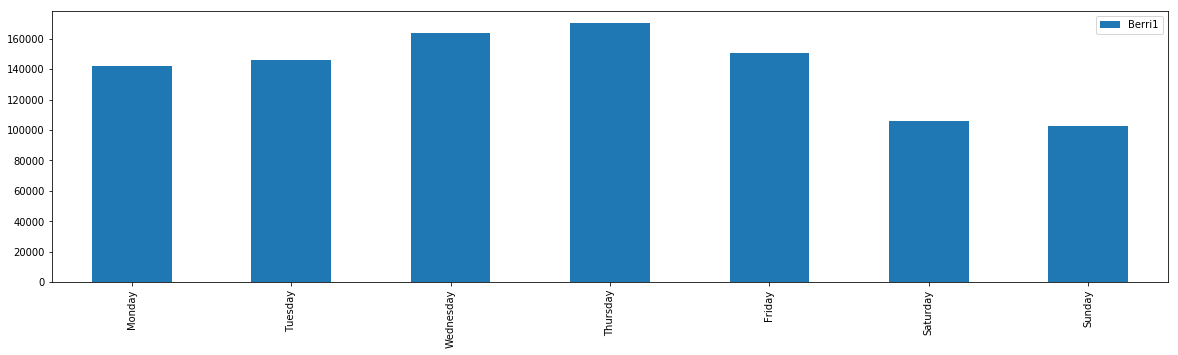

In [16]:
weekday_counts.plot(kind='bar')

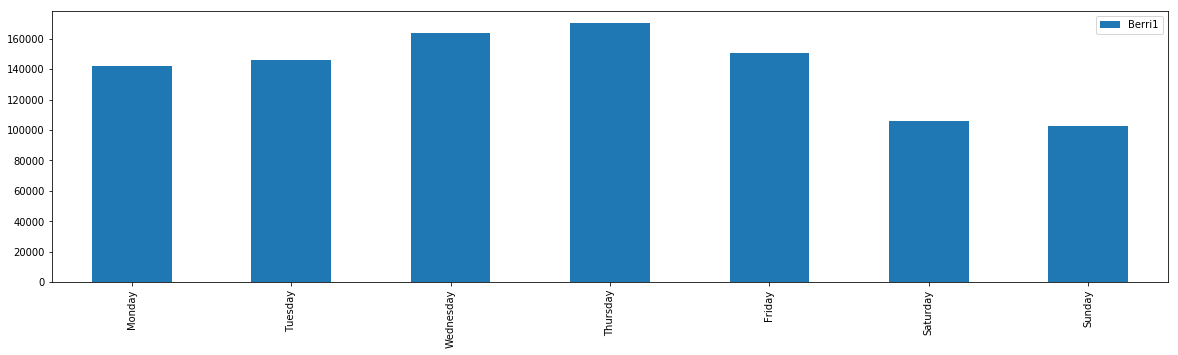

In [17]:
# All together now
bikes = pd.read_csv('data/bikes.csv', 
                #    sep=';', encoding='latin1', 
                    parse_dates=['Date'], dayfirst=True, 
                    index_col='Date')
# Add the weekday column
berri_bikes = bikes[['Berri1']].copy()
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday

# Add up the number of cyclists by weekday, and plot!
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar')